# MULTI CLASSIFICATION ALGORITHM AND BUILDING MULTI LOGIT MODEL ON DATASET (GUJARAT CROP PRODUCTION)    

# INTRODUCTION

Crop Production is influenced by multiple factors. Right from factors like temperature to rainfall to climate etc., crop production varies from place to place. In Gujarat, 54% of the land utilisation is accounted for by cultivation. The total gross cropped area in the state is 12.8 million hectares. Gujarat is the main producer of tobacco, cotton, and groundnuts in India, while the rest of the major crops produced are rice, wheat, jawar, bajra, maize, tur, and gram. The present study helps us in analyzing the crop production in Gujarat from year 1997 to 2012.


# DATA DESCRIPTION:
    
The dataset includes details of different cities in Gujarat and their respective crop production based on multiple factors influencing it, wherein each factor plays an important role in the total production. Visualization techniques used on the dataset helps us to attain the desired conclusion on the most important factor as well as the total production in different years.

The "EXPLORATORY DATA ANALYSIS" below is divided into 2 parts, viz-a-viz., Descriptive Analysis and Visualizations. Furthermore, "Classification Algorithm" is used to make inferences about the model and the dataset.


# ATTRIBUTES:
1. State: Dataset is based on the state of Gujarat
2. City: Multiple cities of Gujarat
3. Year: Year concerned with the production (1997-2012)
4. Season (Categorical Data): Season of harvest: Kharif, Rabi, Summer and Whole Year
5. Area (feature): Area of harvest (in '000 ha)
6. avgTemp (feature): Average temperature (degree Celsius)
7. Precipitation (feature)
8. Rainfall (feature)
9. Production


# OBJECTIVE:

1. The objective here is to illustrate Multi-Classification problem in the agricultural field (Gujarat Crop Production) by building a "Multi-Logit" Model.
2. The dataset contains categorical variables, numerical variables and continuous variables, for which several plots and graphs have been visualized.
3. Based on the insights of "goodness of fit/accuracy measures", we make the future predictions.

# EXPLORATORY DATA ANALYSIS (EDA)

We start the analysis by importing the pre-requisite libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("guj_crop_prod.xlsx")
df.head()

,State,City,Year,Season,Area,avgTemp,Precipitation,Rainfall,Production
0,Gujarat,Ahmedabad,1997,Kharif,2900,31.2394,176.327,540.9,2200.0
1,Gujarat,Ahmedabad,1997,Kharif,41700,31.2394,176.327,540.9,43700.0
2,Gujarat,Ahmedabad,1997,Kharif,700,31.2394,176.327,540.9,700.0
3,Gujarat,Ahmedabad,1997,Kharif,500,31.2394,176.327,540.9,600.0
4,Gujarat,Ahmedabad,1997,Kharif,42500,31.2394,176.327,540.9,33500.0


In [28]:
print(df.shape) #gives the count of rows and columns
print("")
print(df.columns) #gives column details
print("")
print(df.describe()) #gives summary statistics of the data
print("")
print(df.info()) #gives datatype of each variable
print("")
print(df.isnull().sum()) #shows if there's any null value in the dataset
print("")
print(df['Season'].unique()) #gives the unique values in categorical data, Season

(8436, 9)

Index(['State', 'City', 'Year', 'Season', 'Area', 'avgTemp', 'Precipitation',
       'Rainfall', 'Production'],
      dtype='object')

              Year           Area      avgTemp  Precipitation     Rainfall  \
count  8436.000000    8436.000000  8434.000000    8429.000000  8436.000000   
mean   2005.159673   18367.001422    26.456331     518.041159   444.719386   
std       4.586311   48911.276510     3.333164     430.227159   392.677592   
min    1997.000000     100.000000    17.334000       0.000000     5.120000   
25%    2001.000000     500.000000    23.211500      16.519000   120.320000   
50%    2005.000000    2300.000000    27.523333     558.413000   410.300000   
75%    2009.000000   11600.000000    29.254000     824.232000   673.700000   
max    2012.000000  499100.000000    32.023600    2260.642000  1870.260000   

         Production  
count  8.367000e+03  
mean   6.266184e+04  
std    3.927533e+05  
min    0.000000e+00  
25%    6.000000e+02  
50%    3.100000e+03

We see there are multiple null values in the dataset. So, to fill the null values, we check the box plot for every factor and fill the null values with the required imputation technique.


# DATA CLEANING 

Central tendency measure such as mean, median, or mode is considered for imputation. The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately. Plots such as box plots and distribution plots come very handily in deciding which techniques to use.
Depending on the skewness of the curve, we replace the null values using the particular imputation technique.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fig 1. Boxplot of Average Temperature for deciding the technique of imputation')

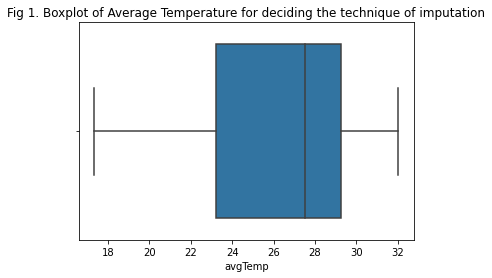

In [15]:
sns.boxplot(df.avgTemp)
plt.title("Fig 1. Boxplot of Average Temperature for deciding the technique of imputation")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fig 2. Boxplot of Precipitation for deciding the technique of imputation')

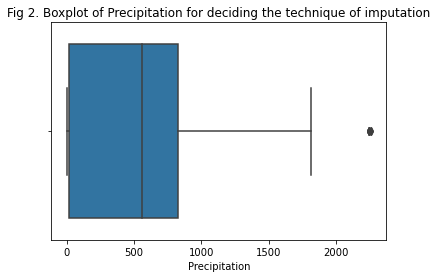

In [16]:
sns.boxplot(df.Precipitation)
plt.title("Fig 2. Boxplot of Precipitation for deciding the technique of imputation")

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fig 3. Boxplot of Production for deciding the technique of imputation')

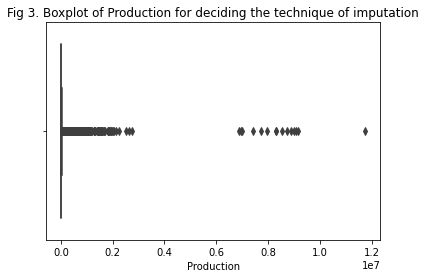

In [17]:
sns.boxplot(df.Production)
plt.title("Fig 3. Boxplot of Production for deciding the technique of imputation")

The data is skewed in all the three boxplots. There are several or large numbers of data points that act as outliers, which will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Imputing missing data with median value can only be done with numerical data and imputing missing data with mode values can be done with numerical and categorical data.

In the present context, all the three variables (temperature, precipitation and production) are numerical data. So, the null values are replced using imputation technique of "median".

In [19]:
df_new=df.fillna(df.median()) #filling the null values using median
df_new.isnull().sum() #rechecking for null values

C:\Users\hp\AppData\Local\Temp/ipykernel_7652/730676815.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new=df.fillna(df.median()) #filling the null values using median


State            0
City             0
Year             0
Season           0
Area             0
avgTemp          0
Precipitation    0
Rainfall         0
Production       0
dtype: int64

It can be seen that using the imputation technique of "median", all the null values have been filled and thus, there are no null values anymore. Hence, the data is pre-processed and cleaned before using it for the further analysis.


# VISUALIZATIONS

The next step is to visualize the dataset using several plots and charts.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density Distribution')

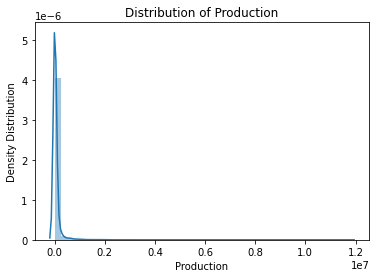

In [20]:
# DistributionPlot- used for both the histogram and densities in the same plot 

sns.distplot(df_new.Production) #distribution plot of production
plt.title("Distribution of Production")
plt.ylabel("Density Distribution")

The distribution plot of Production gives us a skewed (right-skewed) distribution of it's density frequency.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'avgTemp'}>,
        <AxesSubplot:title={'center':'Precipitation'}>],
       [<AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Production'}>]], dtype=object)

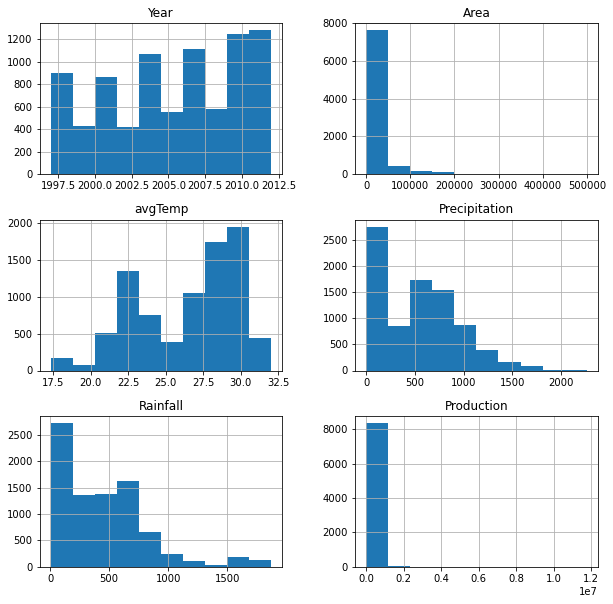

In [21]:
# Histogram- used to plot numerical data and check for its normality in the form of symmetricity.

df_new.hist(figsize=(10,10))

The histogram above says that the numerical data viz-a-viz., Area, Temperature, Precipitation, Rainfall and Production are all skew-symmetric indicating they are not normally distributed.

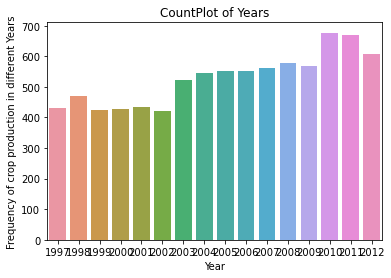

In [24]:
# Countplot- gives the count of each category in a categorical variable.

sns.countplot(x=df_new['Year'])
plt.ylabel("Frequency of crop production in different Years")
plt.title("CountPlot of Years")
plt.show()

The maximum crop production of different crops can be seen in the year 2010, followed by year 2011 and then 2012.

Text(0, 0.5, 'Seasons')

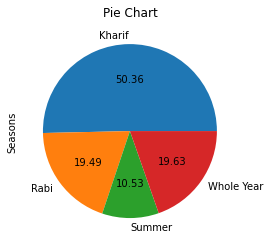

In [25]:
# PieChart- shows the distribution of a categorical variable in "percentage".

a=df_new.groupby('Season').size().plot(kind='pie', autopct='%.2f')
plt.title("Pie Chart")
a.set_ylabel("Seasons")

For maximum number of times, crop production takes place in Kharif season (50.36%), followed by Whole Year crop production (19.63%), Rabi crop (19.49%) and lastly, Summer crop production (10.53%).

In [26]:
# Correlation Matrix- shows the relation between variables in a matrix form.
df_new.corr()

,Year,Area,avgTemp,Precipitation,Rainfall,Production
Year,1.000000,-0.042335,-0.046543,-0.050821,-0.002312,-0.004591
Area,-0.042335,1.000000,0.056437,0.039003,0.018687,0.291091
avgTemp,-0.046543,0.056437,1.000000,0.254093,0.276307,-0.068329
Precipitation,-0.050821,0.039003,0.254093,1.000000,0.651534,0.097229
Rainfall,-0.002312,0.018687,0.276307,0.651534,1.000000,-0.010502
Production,-0.004591,0.291091,-0.068329,0.097229,-0.010502,1.000000


The highest correlation is observed in Rainfall and Precipitation (65%)

Text(0.5, 1.0, 'Heatmap')

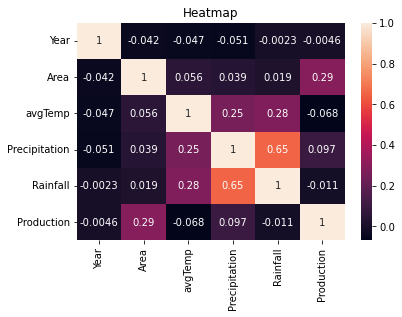

In [29]:
# Heatmap- represents values by colors where square shows the correlation between the variables on each axis

hm=df_new.corr()
sns.heatmap(hm,annot=True)
plt.title("Heatmap")

# CLASSIFICATION ALGORITHM ANALYSIS

Next, the analysis of classification algorithm is carried on to make further analysis on the Logistic Regression Model.

Before proceeding, it is clearly observe that in the column 'Season' there are four categories and hence, we convert them into numerics by assigning different labels to them.

In [32]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Season'.
df_new['Season']= label_encoder.fit_transform(df_new['Season'])
df_new['Season'].unique()
df_new.head()

,State,City,Year,Season,Area,avgTemp,Precipitation,Rainfall,Production
0,Gujarat,Ahmedabad,1997,0,2900,31.2394,176.327,540.9,2200.0
1,Gujarat,Ahmedabad,1997,0,41700,31.2394,176.327,540.9,43700.0
2,Gujarat,Ahmedabad,1997,0,700,31.2394,176.327,540.9,700.0
3,Gujarat,Ahmedabad,1997,0,500,31.2394,176.327,540.9,600.0
4,Gujarat,Ahmedabad,1997,0,42500,31.2394,176.327,540.9,33500.0


Label Encoding gives us the variable array, where 'Kharif'=0, 'Rabi'=1, 'Summer'=2 and 'Whole Year'=3.

In [34]:
df_new['Season'].value_counts() #gives us count of each category

0    4248
3    1656
1    1644
2     888
Name: Season, dtype: int64

In [35]:
k=len(df_new[df_new['Season']==0]) #count of kharif
r=len(df_new[df_new['Season']==1]) #count of rabi
s=len(df_new[df_new['Season']==2]) #count of summer
wy=len(df_new[df_new['Season']==3]) #count of whole year
pct_of_k=k/(k+r+s+wy)
print("The percentage of Kharif Production is ",pct_of_k*100)
pct_of_r=r/(k+r+s+wy)
print("The percentage of Rabi Production is ",pct_of_r*100)
pct_of_s=s/(k+r+s+wy)
print("The percentage of Summer Production is ",pct_of_s*100)
pct_of_wy=wy/(k+r+s+wy)
print("The percentage of Whole Year Production is ",pct_of_wy*100)

The percentage of Kharif Production is  50.355618776671406
The percentage of Rabi Production is  19.487908961593174
The percentage of Summer Production is  10.526315789473683
The percentage of Whole Year Production is  19.630156472261735


It can be seen that there's an imbalanced distribution in all the four categories of season. The same is also seen above in the countplot and hence, before proceeding with the further analysis, we apply SMOTE to balance these categories, SMOTE- "SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)" where we synthesize or duplicate the observations from Minority class.

In [36]:
#deleting unnecessary columns

del df_new['State']
del df_new['City']
del df_new['Year']
del df_new['Production']

#dividing the data into X and y

X = df_new.loc[:, df_new.columns != 'Season']
y = df_new.loc[:, df_new.columns == 'Season']

In [39]:
# SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=63)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
columns = X_train.columns
os_df_new_X,os_df_new_y=os.fit_resample(X_train, y_train)
os_df_new_X = pd.DataFrame(data=os_df_new_X,columns=columns )
os_df_new_y= pd.DataFrame(data=os_df_new_y,columns=['Season'])

# we can Check the numbers of our data

print("Length of oversampled data is ",len(os_df_new_X))
print("Number of Kharif in oversampled data is",len(os_df_new_y[os_df_new_y['Season']==0]))
print("Number of Rabi in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==1]))
print("Number of Summer in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==2]))
print("Number of Whole Year in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==3]))
print("Proportion of Kharif in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==0])/len(os_df_new_X))
print("Proportion of Rabi in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==1])/len(os_df_new_X))
print("Proportion of Summer in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==2])/len(os_df_new_X))
print("Proportion of Whole Year in oversampled data is ",len(os_df_new_y[os_df_new_y['Season']==3])/len(os_df_new_X))

Length of oversampled data is  13588
Number of Kharif in oversampled data is 3397
Number of Rabi in oversampled data is  3397
Number of Summer in oversampled data is  3397
Number of Whole Year in oversampled data is  3397
Proportion of Kharif in oversampled data is  0.25
Proportion of Rabi in oversampled data is  0.25
Proportion of Summer in oversampled data is  0.25
Proportion of Whole Year in oversampled data is  0.25


SMOTE helped us to balance the classification of Season. The proportion of all 4 categories is 0.25 each and the number of variables in each category is 3397.

Next thing is to build a "Logistic Regression Model". This is done usking sklearn library.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(multi_class="multinomial")
logreg.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Lastly, we check the accuracy of the model using "goodness of fit measures".

In [41]:
#CHECKING THE ACCURACY OF FITTED MODEL

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[817   0   7  33]
 [ 14 101 167  27]
 [  5   6 162   0]
 [107   2   2 238]]


The confusion matrix explains sum of all diagonal elements as correct predicitons and sum of all non-diagonal elements as wrong predicitons. It's clearly seen that the sum of wrong predictions are extremely few in number as compared to the sum of correct predictions.

## Classification Report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       857
           1       0.93      0.33      0.48       309
           2       0.48      0.94      0.63       173
           3       0.80      0.68      0.74       349

    accuracy                           0.78      1688
   macro avg       0.77      0.72      0.69      1688
weighted avg       0.82      0.78      0.77      1688



## Interpretation:
- The above report prints precision, recall, F-beta score and support.
- Precision (ability of a classifier not to label an obervation as positive if its negative) is the ratio of TP to the sum of TP and FP (1 is best and O is worst)
- Recall (ability of a classifier to lable all postive observations) is the ratio of TP to the sum of TP and FN (1 is best and O is worst)
- The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting.
- It allows a model to be evaluated taking both the precision and recall into account using a single score.
- Helpful when describing the performance of the model and in comparing models.
- The Fbeta-measure is a generalization of the F-measure that adds a configuration parameter called beta
- Here Macro average is the AM of scores of two classes.
- Since it is balanced classification both average scores will be same.

# Conclusion

1. The data contains 4 different categories of crop namely: Kharif, Rabi, Summer and Whole Year along with the features which affect their production
2. We needed to fit a multi-logit model for classification and hence recommendation to farmers to which crop should be sown.
3. The categorical distribution was an imbalanced data and hence, we used SMOTE to balance the 4 categories.
4. **The fitted model showed the accuracy of 78% which is moderately good sign of model.**
5. This was not a binary classification, hence ROC couldn't be used to assess the accuracy the model.
6. Classification report and Confusion matrix have been explained as the "goodness of fit" measures.